In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from base import *


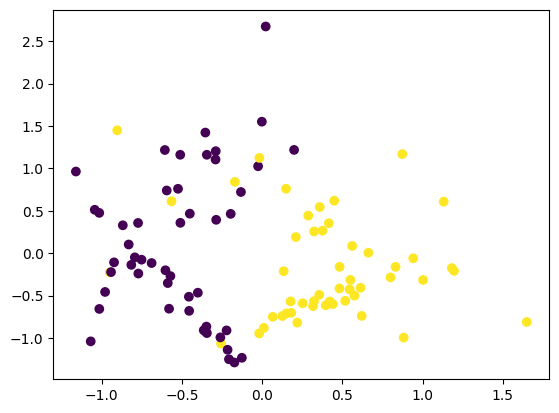

In [14]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
plt.scatter(X[:, 0], X[:, 1], c=y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train

array([[-1.96371397e-01,  4.63827158e-01],
       [ 1.00284911e+00, -3.16122069e-01],
       [-1.26791126e-01, -1.23440213e+00],
       [-7.52300041e-01, -7.68591827e-02],
       [ 1.98780745e-01,  1.21834622e+00],
       [ 2.86942710e-01,  4.42948786e-01],
       [ 4.49132232e-01,  6.19557681e-01],
       [-1.70464809e-01,  8.41041466e-01],
       [-1.04398637e+00,  5.11884782e-01],
       [-9.50013352e-01, -2.26541589e-01],
       [-2.56942895e-01, -1.06629795e+00],
       [-2.18600166e-03,  1.55132133e+00],
       [ 1.18227070e+00, -1.75968771e-01],
       [ 4.40460668e-01, -6.00299177e-01],
       [ 2.18089842e-02,  2.67462483e+00],
       [-5.80775364e-01, -6.55307463e-01],
       [ 5.17378038e-01, -5.62209568e-01],
       [-1.32628061e-01,  7.21755798e-01],
       [-1.86541604e-02, -9.46327854e-01],
       [-1.01555340e+00, -6.58048526e-01],
       [-3.52598947e-01, -9.25549825e-01],
       [-2.22150149e-01, -9.11294144e-01],
       [ 2.09932404e-01,  1.90209191e-01],
       [ 1.

In [17]:
tree = DecisionTree(criterion='information_gain', max_depth=4)
tree.fit(X_train, y_train)

In [18]:
y_pred = tree.predict(X_test)
accuracy_ = accuracy(y_test, y_pred)
print("Accuracy of the model:", accuracy_, "\n")
print("Precision for Class 0:", precision(y_pred, y_test, 0))
print("Recall for Class 0:", recall(y_pred, y_test, 0),"\n")
print("Precision for Class 1:", precision(y_pred, y_test, 1))
print("Recall for Class 1:", recall(y_pred, y_test, 1),"\n")

Accuracy of the model: 0.8666666666666667 

Precision for Class 0: 0.8666666666666667
Recall for Class 0: 0.8666666666666667 

Precision for Class 1: 0.8666666666666667
Recall for Class 1: 0.8666666666666667 



5 FOLD CROSS VALIDATION

In [19]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k = 5  # Number of folds
accuracies = []

# Function to compute accuracy score
def compute_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Cross-validation loop
for depth in max_depth:
    fold_size = int(len(X) / k)
    fold_accuracies = []

    for i in range(k):
        test_start = i * fold_size
        test_end = (i + 1) * fold_size
        
        # Create test and train sets
        test_set = X[test_start:test_end]
        test_labels = y[test_start:test_end]

        train_set = np.concatenate([X[:test_start], X[test_end:]])
        train_labels = np.concatenate([y[:test_start], y[test_end:]])
        
        # Convert to DataFrame and Series
        train_set = pd.DataFrame(train_set)
        train_labels = pd.Series(train_labels)
        test_set = pd.DataFrame(test_set)
        test_labels = pd.Series(test_labels)

        # Train and predict with DecisionTree
        tree = DecisionTree(criterion='gini_index', max_depth=depth)
        tree.fit(train_set, train_labels)
        y_pred = tree.predict(test_set)
        
        # Compute accuracy
        accuracy_ = compute_accuracy(test_labels, y_pred)
        fold_accuracies.append(accuracy_)

    # Calculate average accuracy for this depth
    mean_accuracy = np.mean(fold_accuracies)
    accuracies.append((depth, mean_accuracy))

In [20]:
best_depth = None
best_accuracy = -np.inf

for depth, accuracy in accuracies:
    if accuracy > best_accuracy:
        best_depth = depth
        best_accuracy = accuracy

In [22]:
print(f"Best max_depth: {best_depth}")
print(f"Best cross-validation accuracy: {best_accuracy:.2f}")

Best max_depth: 2
Best cross-validation accuracy: 0.91


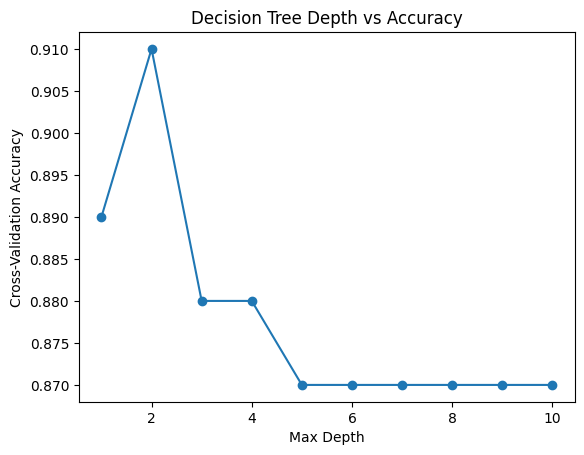

In [23]:
depths, scores = zip(*accuracies)
plt.plot(depths, scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.show()